In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import nltk
nltk.download('wordnet')
nltk.download("stopwords")
nltk.download('punkt')
from nltk.corpus import stopwords
import string
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from string import punctuation
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from imblearn.under_sampling import RandomUnderSampler

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
data = pd.read_csv("HateSpeechDetection.csv")

In [ ]:
data.head()

,Platform,Comment,Hateful
0,Reddit,Damn I thought they had strict gun laws in Ger...,0
1,Reddit,I dont care about what it stands for or anythi...,0
2,Reddit,It's not a group it's an idea lol,0
3,Reddit,So it's not just America!,0
4,Reddit,The dog is a spectacular dancer considering he...,0


In [ ]:
data = data.drop("Platform", axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  3000 non-null   object
 1   Hateful  3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB


In [ ]:
data.isnull().sum()

Comment    0
Hateful    0
dtype: int64

In [ ]:
data.shape

(3000, 2)

In [ ]:
data['Hateful'].value_counts()

0    2400
1     600
Name: Hateful, dtype: int64

Under sampling

In [ ]:
#undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
#X = data['Comment']
#y = data['Hateful']
#X_resampled, y_resampled = undersampler.fit_resample(X.to_frame(), y)
#resampled_data = pd.DataFrame({'Comment': X_resampled.squeeze(), 'Hateful': y_resampled})

#print("\nClass distribution after random undersampling:")
#print(resampled_data['Hateful'].value_counts())

Oversampling

In [ ]:
hateful_0_count = data[data['Hateful'] == 0]['Comment'].count()
hate = data[data['Hateful'] == 1]
no_hate = data[data['Hateful'] == 0]
hate_oversample = hate.sample(hateful_0_count, replace=True)
data_oversampled = pd.concat([no_hate, hate_oversample], axis=0)

print('Random over-sampling:')
print(data_oversampled['Hateful'].value_counts())

Random over-sampling:
0    2400
1    2400
Name: Hateful, dtype: int64


In [ ]:
data_oversampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4800 entries, 0 to 1419
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  4800 non-null   object
 1   Hateful  4800 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 112.5+ KB


Visualization

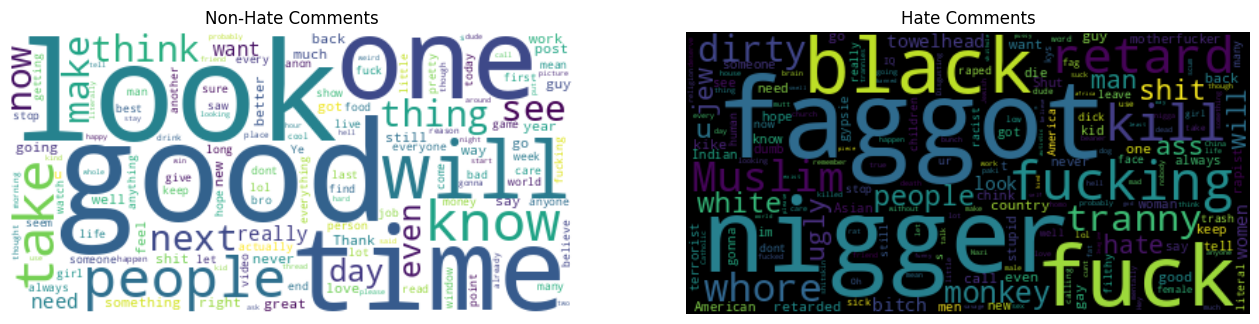

In [ ]:
fig, axs = plt.subplots(1,2 , figsize=(16,8))
text_pos = " ".join(data['Comment'][data.Hateful == 0])
text_neg = " ".join(data['Comment'][data.Hateful == 1])
data_pos = WordCloud(collocations = False, background_color = 'white').generate(text_pos)
data_neg = WordCloud(collocations = False, background_color = 'black').generate(text_neg)
axs[0].imshow(data_pos, interpolation='bilinear')
axs[0].axis('off')
axs[0].set_title('Non-Hate Comments')
axs[1].imshow(data_neg, interpolation='bilinear')
axs[1].axis('off')
axs[1].set_title('Hate Comments')

plt.show()

Vertical Splitting

In [ ]:
x =data_oversampled["Comment"].values
y =data_oversampled["Hateful"].values

In [ ]:
x.shape

(4800,)

In [ ]:
y.shape

(4800,)

In [ ]:
data_oversampled

,Comment,Hateful
0,Damn I thought they had strict gun laws in Ger...,0
1,I dont care about what it stands for or anythi...,0
2,It's not a group it's an idea lol,0
3,So it's not just America!,0
4,The dog is a spectacular dancer considering he...,0
...,...,...
956,"definitely black by his iq, picked probably th...",1
1836,You're just a common street whore,1
1559,I'm sorry but niggers are full of it!!,1
2984,Im gonna save the nastiest white whore riddled...,1


Data Preprocessing

In [ ]:
stopword_list = stopwords.words("english")

def clean_data(data):
    tokens = word_tokenize(data)
    clean_text = [word.lower() for word in tokens if (word not in punctuation) and(word.lower() not in stopword_list) and(len(word)>2) and (word.isalpha())]
    return clean_text

def lemmatization(data):
    lemmatizer = WordNetLemmatizer()
    final_data = []
    for word in data:
        lemmatized_word = lemmatizer.lemmatize(word)
        final_data.append(lemmatized_word)
    return " ".join(final_data)


In [ ]:
data_oversampled["Comment"] = data_oversampled["Comment"].apply(clean_data)
data_oversampled["Comment"] = data_oversampled["Comment"].apply(lemmatization)

In [ ]:
data_oversampled

,Comment,Hateful
0,damn thought strict gun law germany,0
1,dont care stand anything connected like shield,0
2,group idea lol,0
3,america,0
4,dog spectacular dancer considering two left foot,0
...,...,...
956,definitely black picked probably worst battle ...,1
1836,common street whore,1
1559,sorry nigger full,1
2984,gon save nastiest white whore riddled nigger s...,1


Vectorization

In [ ]:
tfidf=TfidfVectorizer()
x=tfidf.fit_transform(x)
x=x.toarray()
x.shape

(4800, 6153)

Horizontal Splitting

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [ ]:
print("xtrain: ", xtrain.shape)
print("ytrain: ", ytrain.shape)
print("xtest: ", xtest.shape)
print("ytest: ", ytest.shape)

xtrain:  (3840, 6153)
ytrain:  (3840,)
xtest:  (960, 6153)
ytest:  (960,)


Decision Tree

In [ ]:
model1 = DecisionTreeClassifier()
model1.fit(xtrain,ytrain)
predict1=model1.predict(xtest)
accuracy1 = accuracy_score(ytest,predict1)
print("Accuracy of Decision Tree :", accuracy1)
print("Confusion Matrix: \n", confusion_matrix(ytest, predict1))

Accuracy of Decision Tree : 0.9802083333333333
Confusion Matrix: 
 [[457  14]
 [  5 484]]


In [ ]:
test_data = "Desecrate men by making them gay/trannies, and women by making them abort children and become psycho feminist cunts etc"
data = tfidf.transform([test_data]).toarray()
print(model1.predict(data))

[1]


In [ ]:
test_data = "Saudi Arabia has tv? I thought they just watched public rapes for entertainment"
data = tfidf.transform([test_data]).toarray()
print(model1.predict(data))

[1]


Logistic Regression

In [ ]:
model2=LogisticRegression()
model2.fit(xtrain,ytrain)
predict2=model2.predict(xtest)
accuracy2 = accuracy_score(ytest,predict2)
print("Accuracy of Logistic Regression :",accuracy2)
print("Confusion Matrix: \n", confusion_matrix(ytest, predict2))

Accuracy of Logistic Regression : 0.9708333333333333
Confusion Matrix: 
 [[462   9]
 [ 19 470]]


Naive Bayes

In [ ]:
model3= BernoulliNB(binarize= 0.0)
model3.fit(xtrain, ytrain)
predict3= model3.predict(xtest)
accuracy3 = accuracy_score(ytest, predict3)
print("Accuracy of Bernouli Naive Bayes :",accuracy3)
print("Confusion Matrix: \n", confusion_matrix(ytest, predict3))

Accuracy of Bernouli Naive Bayes : 0.94375
Confusion Matrix: 
 [[425  46]
 [  8 481]]


In [ ]:
test_data = "you are sweet"
df = tfidf.transform([test_data]).toarray()
print(model3.predict(df))

[0]


Random Forest Classifier

In [ ]:
model4 = RandomForestClassifier(n_estimators = 50)
model4.fit(xtrain, ytrain)
predict4 = model4.predict(xtest)
accuracy4 = accuracy_score(predict4, ytest)
print("Accuracy Score of Random Forest:", accuracy4)
print("Confusion Matrix: ", confusion_matrix(predict4, ytest))

Accuracy Score of Random Forest: 0.9916666666666667
Confusion Matrix:  [[468   5]
 [  3 484]]


In [ ]:
test_data = "The Irony of calling the Asian guy/girl a monkey is just too funny to be true."
df = tfidf.transform([test_data]).toarray()
print(model4.predict(df))

[1]


In [ ]:
test_data = "you are good"
df = tfidf.transform([test_data]).toarray()
print(model4.predict(df))

[0]


Gradient Boosting

In [ ]:
scaler=MinMaxScaler() #normalizing
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.transform(xtest)

In [ ]:
lr_list=[0.05,0.075,0.1,0.25,0.5,0.75,1]

In [ ]:
for learning_rate in lr_list:
  model5 = GradientBoostingClassifier(n_estimators=100, learning_rate=learning_rate,max_features=2,max_depth=2,random_state=0)
  model5.fit(xtrain_scaled,ytrain)
  predict5 = model5.predict(xtest_scaled)

  print("Learning Rate: ", learning_rate)
  print("Accuracy_score (training): {0:.3f}".format(model5.score(xtrain_scaled,ytrain)))
  print("Accuracy_score (testing): {0:.3f}".format(model5.score(xtest_scaled,ytest)))
  #with which learning rate best score

Learning Rate:  0.05
Accuracy_score (training): 0.670
Accuracy_score (testing): 0.641
Learning Rate:  0.075
Accuracy_score (training): 0.670
Accuracy_score (testing): 0.642
Learning Rate:  0.1
Accuracy_score (training): 0.671
Accuracy_score (testing): 0.644
Learning Rate:  0.25
Accuracy_score (training): 0.673
Accuracy_score (testing): 0.645
Learning Rate:  0.5
Accuracy_score (training): 0.674
Accuracy_score (testing): 0.649
Learning Rate:  0.75
Accuracy_score (training): 0.675
Accuracy_score (testing): 0.649
Learning Rate:  1
Accuracy_score (training): 0.671
Accuracy_score (testing): 0.644


In [ ]:
model5 = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.5,max_features=2,max_depth=2,random_state=0)
model5.fit(xtrain_scaled,ytrain)
predict5 = model5.predict(xtest_scaled)
accuracy5 = accuracy_score(predict5, ytest)
print("Accuracy Score of Gradient Boosting: ",accuracy5)
print("Confusion Matrix: \n", confusion_matrix(predict5, ytest))

Accuracy Score of Gradient Boosting:  0.9177083333333333
Confusion Matrix: 
 [[432  40]
 [ 39 449]]


In [ ]:
test_data = "The Irony of calling the Asian guy/girl a monkey is just too funny to be true. "
df = tfidf.transform([test_data]).toarray()
print(model5.predict(df))

[0]


Ada Boosting

In [ ]:
model6=AdaBoostClassifier(n_estimators=50)
model6.get_params
model6.fit(xtrain_scaled,ytrain)
predict6=model6.predict(xtest)
accuracy6 = accuracy_score(predict6, ytest)
print("Accuracy Score of Ada Boost: ", accuracy_score(predict6, ytest))
print("Confusion Matrix: ", confusion_matrix(predict6, ytest))

Accuracy Score of Ada Boost:  0.834375
Confusion Matrix:  [[463 151]
 [  8 338]]


XGBoost

In [ ]:
model7 = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model7.fit(xtrain, ytrain)
predict7 = model7.predict(xtest)
accuracy7 = accuracy_score(predict7, ytest)
print("Accuracy Score of XGBoost: ", accuracy7)
print("Confusion Matrix: ", confusion_matrix(predict7, ytest))

Accuracy Score of XGBoost:  0.8427083333333333
Confusion Matrix:  [[467 147]
 [  4 342]]


Stacking

In [ ]:
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor

In [ ]:
 def get_stacking():
   level0=list()
   level0.append(('knn',KNeighborsRegressor()))
   level0.append(('cart',DecisionTreeRegressor()))
   level0.append(('svm',SVR()))
   level1=LinearRegression()
   model=StackingRegressor(estimators=level0,final_estimator=level1) # to create main model
   return model

In [ ]:
# #retrieving models
def get_model():
   models=dict()
   models['knn']=KNeighborsRegressor()
   models['cart']=DecisionTreeRegressor()
   models['svm']=SVR()
   models['stacking']=get_stacking()
   return models

In [ ]:
def evaluate_model(model,x,y):
   cv=RepeatedKFold(n_splits=10,n_repeats=3,random_state=1)
   scores=cross_val_score(model,x,y,scoring='neg_mean_absolute_error',cv=cv)
   return scores

In [ ]:
models=get_model()
results,names=list(),list()
for name,model in models.items():
   scores=evaluate_model(model,x,y)
   results.append(scores)
   names.append(model)
   print(name,mean(scores))

knn -0.17486111111111108
cart -0.030902777777777782
svm -0.14955482640688147


In [ ]:
print("Accuracy of Decision Tree :",accuracy1)
print("Accuracy of Logisitc Regression :",accuracy2)
print("Accuracy of Naives Bayes:",accuracy3)
print("Accuracy of Random Forest :",accuracy4)
print("Accuracy Score of Gradient Boosting: ", accuracy5)
print("Accuracy of Ada Boosting: ", accuracy6)
print("Accuracy of XGBoost :",accuracy7)

Accuracy of Decision Tree : 0.9802083333333333
Accuracy of Logisitc Regression : 0.9708333333333333
Accuracy of Naives Bayes: 0.94375
Accuracy of Random Forest : 0.9916666666666667
Accuracy Score of Gradient Boosting:  0.9177083333333333
Accuracy of Ada Boosting:  0.834375
Accuracy of XGBoost : 0.8427083333333333


Evaluating Accuracy a Score

In [ ]:
# plt.plot(fpr_np,tpr_np,label="Naive Bayes, AUC="+str(auc_np))
# plt.plot(fpr_dt,tpr_dt,label="Decision Tree, AUC="+str(auc_dt))
# plt.plot(fpr_knn,tpr_knn,label="K-Nearest Neighbors, AUC="+str(auc_knn))
# plt.plot(fpr_lr,tpr_lr,label="Logistic Regression, AUC="+str(auc_lr))
# plt.plot(fpr_rf,tpr_rf,label="Random Forest, AUC="+str(auc_rf))
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.title('ROC Curve')

# #add legend
# plt.legend()

User input

In [ ]:
userinp = [input()]
cleaned = [clean_data(i) for i in userinp]
cleaned = [lemmatization(i) for i in userinp]
cleaned = tfidf.transform(cleaned)
cleaned = cleaned.toarray()
out = model3.predict(cleaned)
if out[0] == 1:
  print("Hateful Comment")
else:
  print("Non Hateful Comment")

In [ ]:
userinp = [input()]
cleaned = [clean_data(i) for i in userinp]
cleaned = [lemmatization(i) for i in userinp]
cleaned = tfidf.transform(cleaned)
cleaned = cleaned.toarray()
out = model3.predict(cleaned)
if out[0] == 1:
  print("Hateful Comment")
else:
  print("Non Hateful Comment")

Non Hateful Comment
